In [55]:
from prettytable import PrettyTable
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from load_data import Dataloader
import pickle
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.metrics import classification_report


In [24]:
df = pd.read_csv('SeoulBikeData.csv',encoding='ISO-8859-1')
df.describe()
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

## Extracting Features from Date

In [25]:
df.info()
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)
df['month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day_of_week
df['Snowfall (cm)'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

c:\Users\chait\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\chait\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\chait\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\chait\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/12/2017' in DD/MM/YYYY format. Provide format or specif

array([0. , 0.1, 0.3, 0.4, 0.2, 1. , 0.9, 0.8, 0.7, 0.6, 2.7, 4. , 4.1,
       4.3, 3.9, 3.1, 2.1, 1.4, 0.5, 1.3, 1.8, 2. , 4.8, 5.1, 5. , 4.2,
       3.2, 2.6, 2.5, 2.3, 2.2, 1.9, 1.7, 1.6, 2.4, 1.2, 1.1, 3. , 3.3,
       3.5, 3.4, 2.8, 1.5, 3.8, 3.7, 7.1, 8.8, 7. , 6. , 3.6, 2.9])

In [26]:
df['Holiday'] = df['Holiday'].replace({'No Holiday' : 0,'Holiday': 1})
df['Functioning Day'] = df['Functioning Day'].replace({'Yes':1,'No':0})
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,1,3
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1,3
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,1,11,4
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,1,11,4
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,1,11,4
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,1,11,4


In [27]:
df['Rainfall(mm)'].value_counts()

0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
1.9        1
3.3        1
17.0       1
1.4        1
1.8        1
Name: Rainfall(mm), Length: 61, dtype: int64

In [28]:
category_features = ['Seasons', 'Holiday', 'month', 'Day', 'Hour']
number_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

features = category_features + number_features
target = ['Rented Bike Count']
df[features]

,Seasons,Holiday,month,Day,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,Winter,0,1,3,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,Winter,0,1,3,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,Winter,0,1,3,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,Winter,0,1,3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,Winter,0,1,3,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,Autumn,0,11,4,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,Autumn,0,11,4,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,Autumn,0,11,4,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,Autumn,0,11,4,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [29]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
Day                          0
dtype: int64

In [30]:
df[category_features] = df[category_features].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   category      
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   category      
 12  Holida

## Visualization

<AxesSubplot:xlabel='Functioning Day', ylabel='Rented Bike Count'>

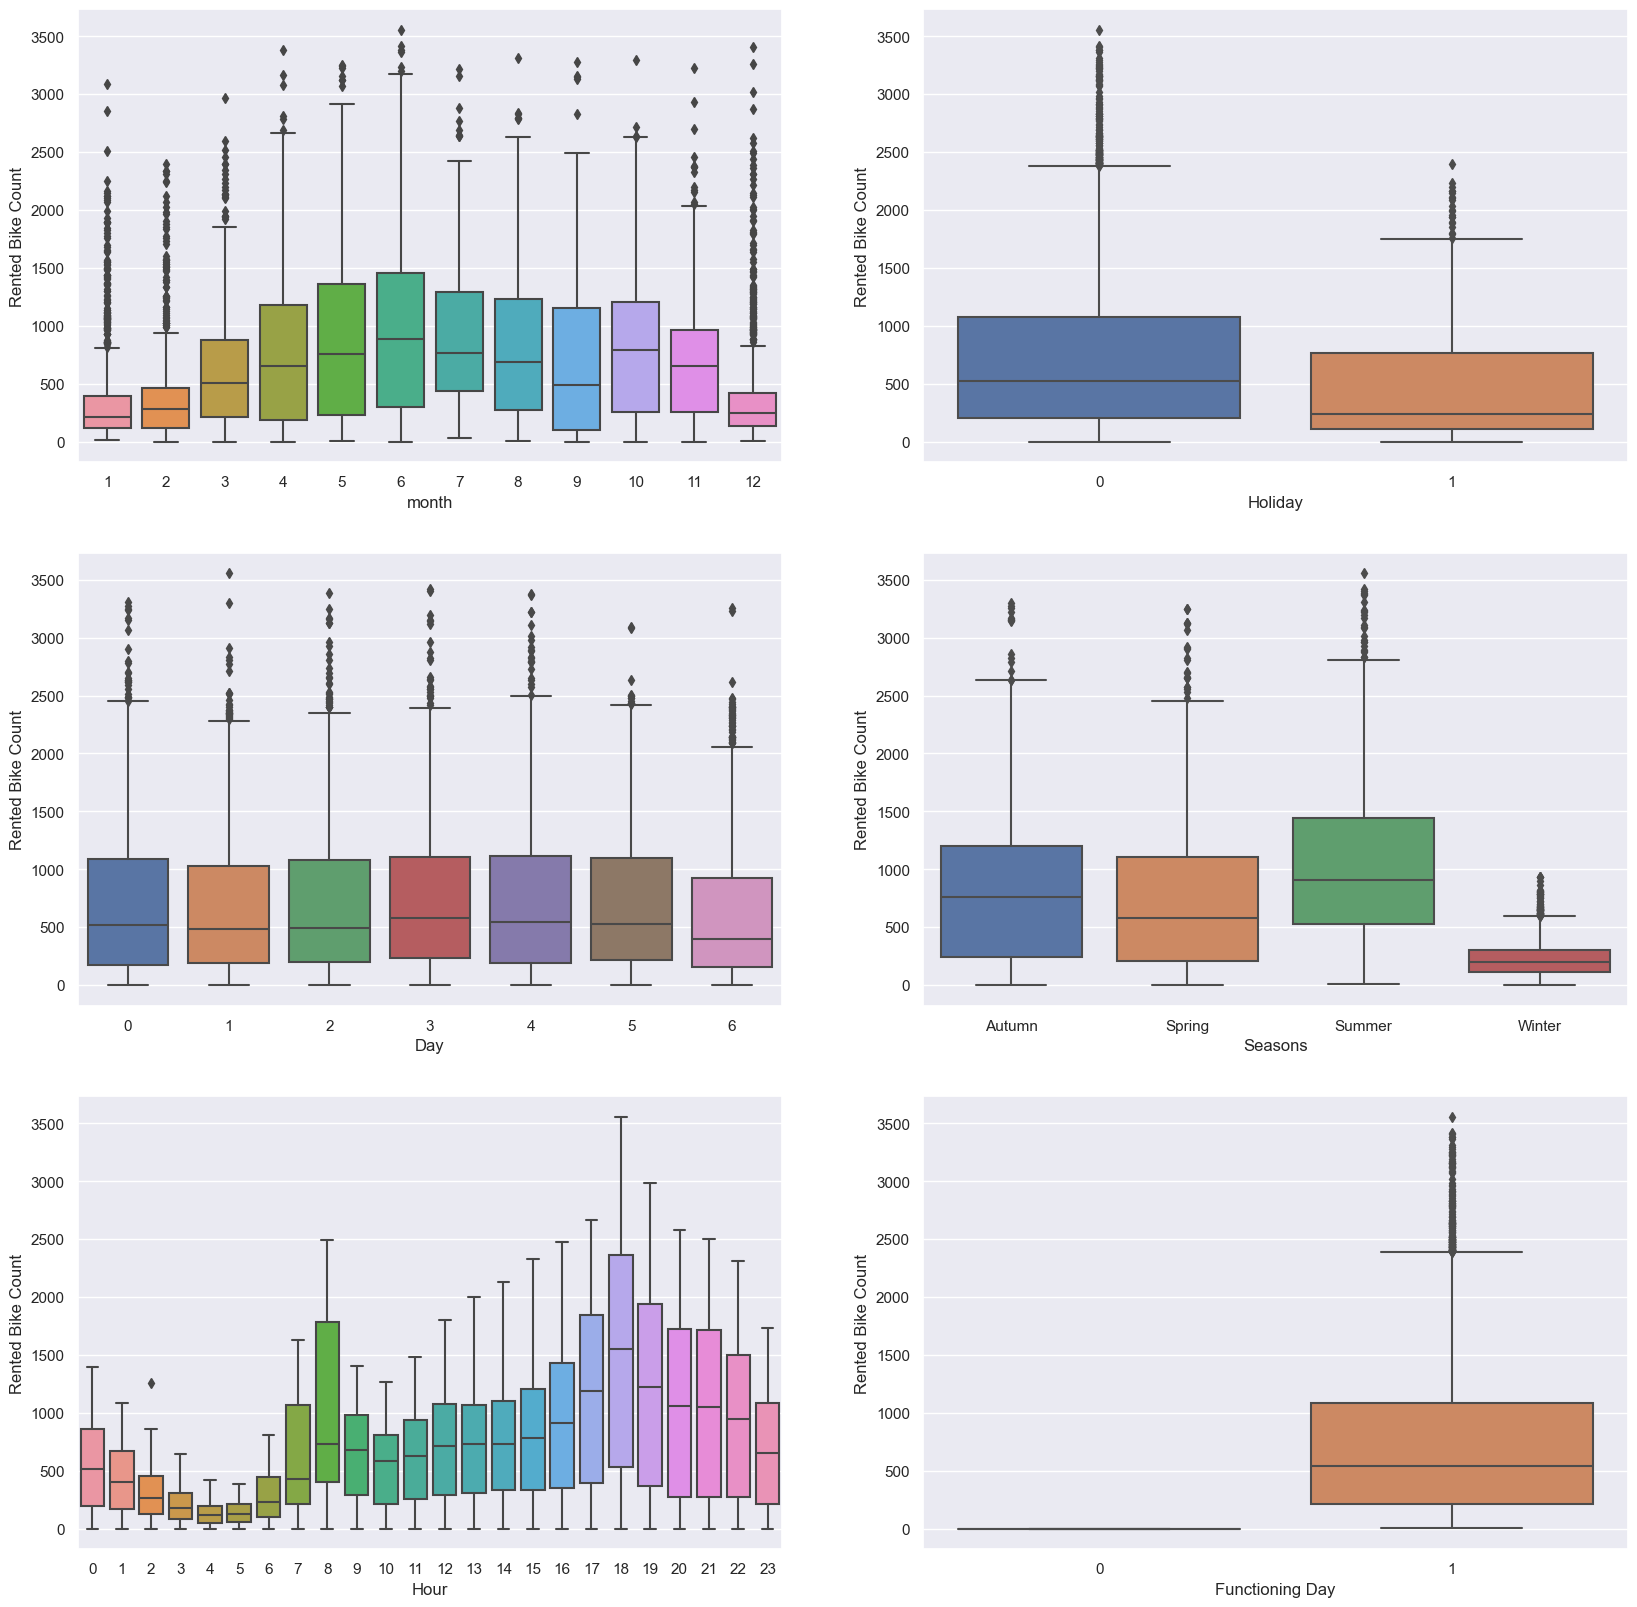

In [31]:
fig,ax = plt.subplots(3,2)
fig.set_size_inches(20,20)
plt.subplots_adjust(hspace=0.2)
sns.set(font_scale = 1.0)
sns.boxplot(data=df,x="month",y="Rented Bike Count",ax=ax[0][0])
sns.boxplot(data=df,x="Holiday",y="Rented Bike Count",ax=ax[0][1])
sns.boxplot(data=df,x="Day",y="Rented Bike Count",ax=ax[1][0])
sns.boxplot(data=df,x="Seasons",y="Rented Bike Count",ax=ax[1][1])
sns.boxplot(data=df,x="Hour",y="Rented Bike Count",ax=ax[2][0])
sns.boxplot(data=df,x="Functioning Day",y="Rented Bike Count",ax=ax[2][1])


<AxesSubplot:xlabel='Rented Bike Count'>

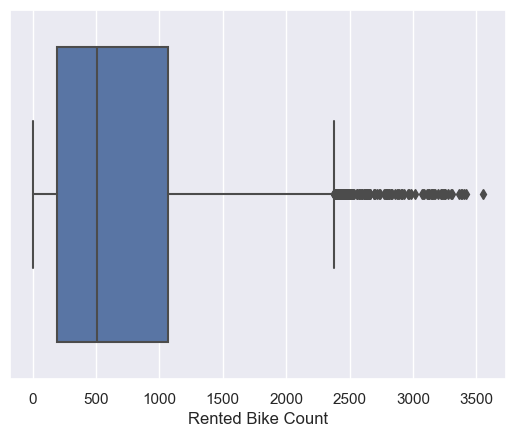

In [32]:
sns.boxplot(data=df,x="Rented Bike Count")

## Outlier Analysis

In [33]:
Q1 = np.percentile(df['Rented Bike Count'],25)
Q3 = np.percentile(df['Rented Bike Count'],75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(df[(df['Rented Bike Count']>= lower_bound) & (df['Rented Bike Count']<=upper_bound)])
mask = [(df['Rented Bike Count']>= lower_bound) & (df['Rented Bike Count']<=upper_bound)]

           Date  Rented Bike Count Hour  Temperature(°C)  Humidity(%)  \
0    2017-01-12                254    0             -5.2           37   
1    2017-01-12                204    1             -5.5           38   
2    2017-01-12                173    2             -6.0           39   
3    2017-01-12                107    3             -6.2           40   
4    2017-01-12                 78    4             -6.0           36   
...         ...                ...  ...              ...          ...   
8755 2018-11-30               1003   19              4.2           34   
8756 2018-11-30                764   20              3.4           37   
8757 2018-11-30                694   21              2.6           39   
8758 2018-11-30                712   22              2.1           41   
8759 2018-11-30                584   23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000            

## Filtering Dataset based on Outliers

In [34]:
df = df[mask[0]]
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,1,3
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1,3
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,1,11,4
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,1,11,4
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,1,11,4
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,1,11,4


In [14]:
df.drop(columns=['Seasons'],inplace=True)
df.to_csv('preprocessed_data.csv', index=False)

C:\Users\chait\AppData\Local\Temp\ipykernel_20252\3704420868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Seasons'],inplace=True)


<AxesSubplot:xlabel='Rented Bike Count'>

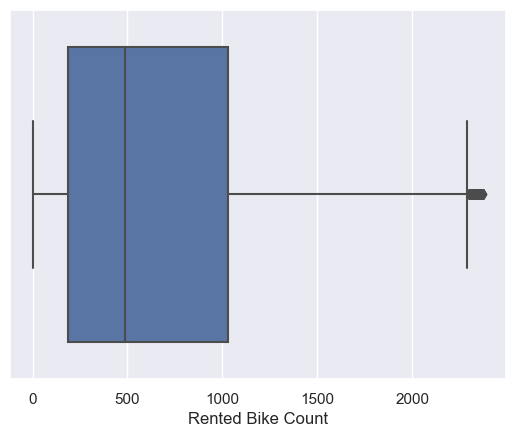

In [36]:
sns.boxplot(data=df,x="Rented Bike Count")

## Scatterplots

<AxesSubplot:xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

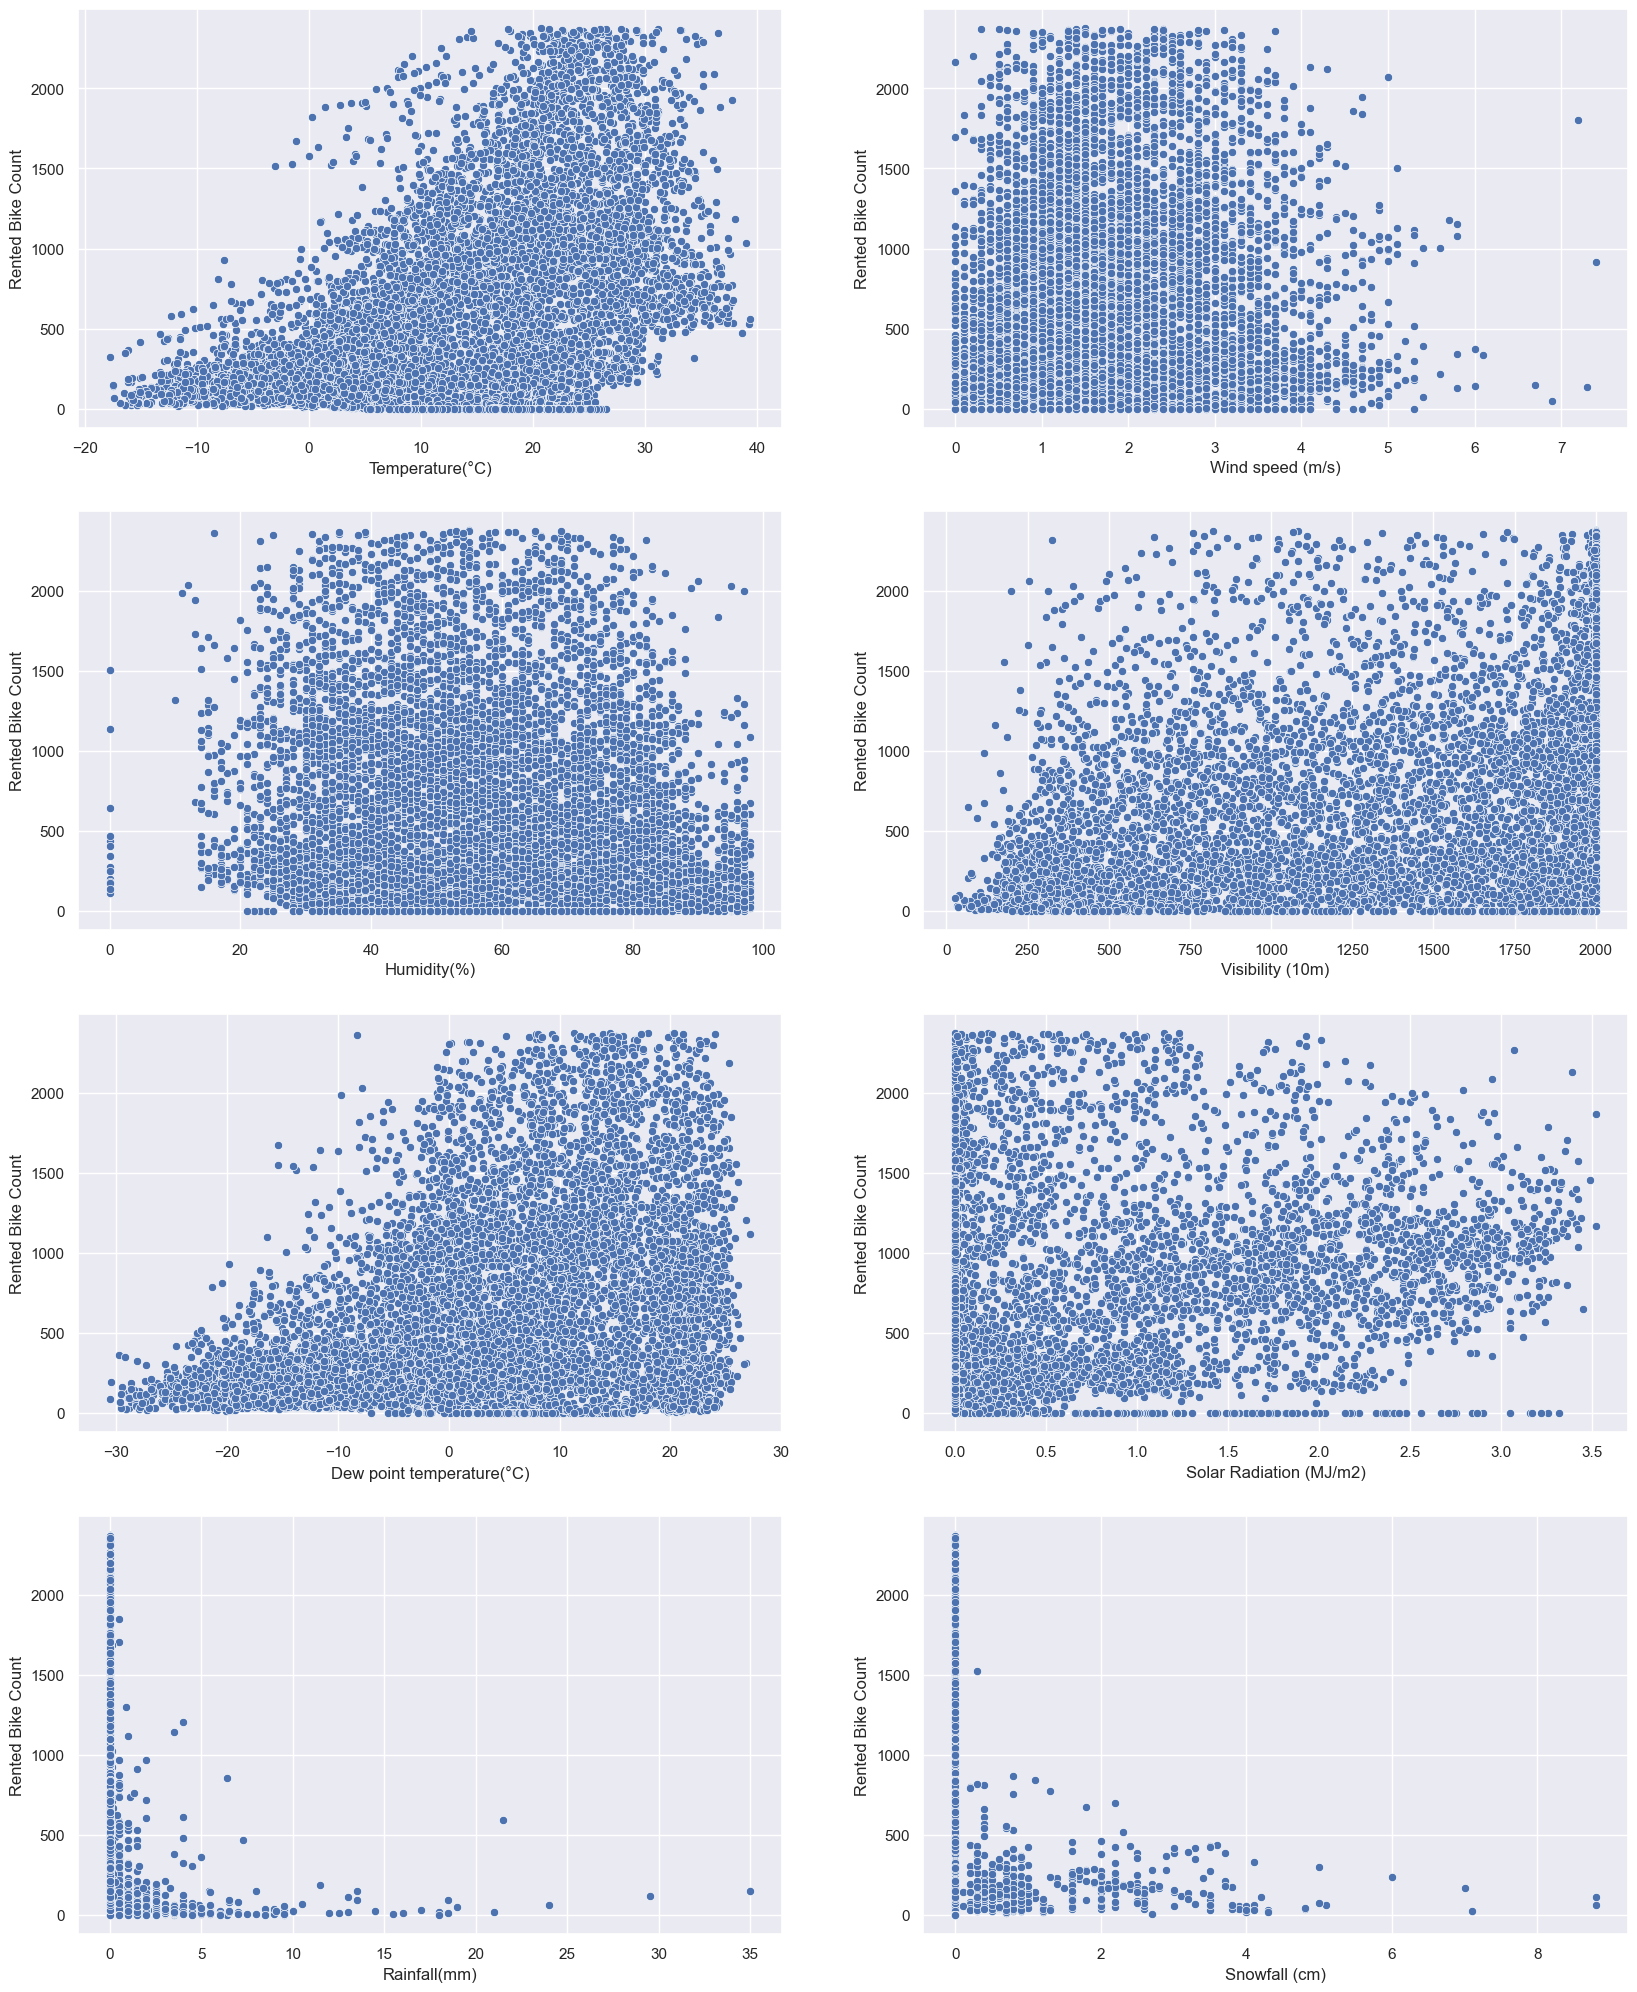

In [37]:

fig,ax  = plt.subplots(4,2)
plt.subplots_adjust(hspace=0.2)
fig.set_size_inches(20,25)
sns.scatterplot(data="df",x=df['Temperature(°C)'],y=df['Rented Bike Count'],ax=ax[0][0])
sns.scatterplot(data="df",x=df['Wind speed (m/s)'],y=df['Rented Bike Count'],ax=ax[0][1])
sns.scatterplot(data="df",x=df['Humidity(%)'],y=df['Rented Bike Count'],ax=ax[1][0])
sns.scatterplot(data="df",x=df['Visibility (10m)'],y=df['Rented Bike Count'],ax=ax[1][1])
sns.scatterplot(data="df",x=df['Dew point temperature(°C)'],y=df['Rented Bike Count'],ax=ax[2][0])
sns.scatterplot(data="df",x=df['Solar Radiation (MJ/m2)'],y=df['Rented Bike Count'],ax=ax[2][1])
sns.scatterplot(data="df",x=df['Rainfall(mm)'],y=df['Rented Bike Count'],ax=ax[3][0])
sns.scatterplot(data="df",x=df['Snowfall (cm)'],y=df['Rented Bike Count'],ax=ax[3][1])


In [38]:
corr = df[features+target].corr()
corr

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
Temperature(°C),1.000000,0.168346,-0.044907,0.027307,0.913129,0.356291,0.053082,-0.217566,0.539483
Humidity(%),0.168346,1.000000,-0.337334,-0.542507,0.543954,-0.463539,0.236559,0.107463,-0.196393
Wind speed (m/s),-0.044907,-0.337334,1.000000,0.170577,-0.184286,0.333869,-0.018684,-0.002113,0.104367
Visibility (10m),0.027307,-0.542507,0.170577,1.000000,-0.182725,0.150552,-0.167621,-0.121084,0.193498
Dew point temperature(°C),0.913129,0.543954,-0.184286,-0.182725,1.000000,0.094687,0.127940,-0.149737,0.379862
Solar Radiation (MJ/m2),0.356291,-0.463539,0.333869,0.150552,0.094687,1.000000,-0.074448,-0.072442,0.286884
Rainfall(mm),0.053082,0.236559,-0.018684,-0.167621,0.127940,-0.074448,1.000000,0.008089,-0.127669
Snowfall (cm),-0.217566,0.107463,-0.002113,-0.121084,-0.149737,-0.072442,0.008089,1.000000,-0.145819
Rented Bike Count,0.539483,-0.196393,0.104367,0.193498,0.379862,0.286884,-0.127669,-0.145819,1.000000


<AxesSubplot:>

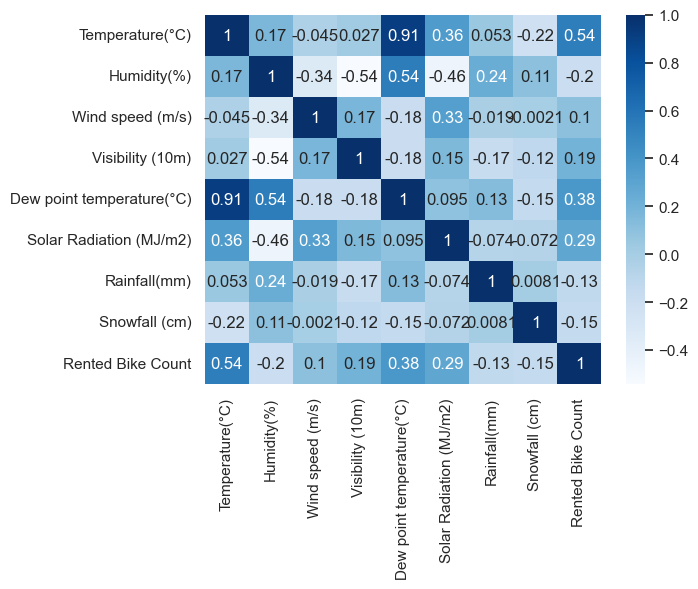

In [39]:
sns.heatmap(corr,annot=True,cmap ='Blues')

## One hot encoding for Categorical Features

In [40]:
one_hot_encoded = pd.get_dummies(df[category_features])

In [41]:
newdf = pd.concat([one_hot_encoded,df[number_features+target]],axis=1)
newdf

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_0,Holiday_1,month_1,month_2,month_3,month_4,...,Hour_23,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
0,0,0,0,1,1,0,1,0,0,0,...,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,254
1,0,0,0,1,1,0,1,0,0,0,...,0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,204
2,0,0,0,1,1,0,1,0,0,0,...,0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,173
3,0,0,0,1,1,0,1,0,0,0,...,0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,107
4,0,0,0,1,1,0,1,0,0,0,...,0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,0,0,0,1,0,0,0,0,0,...,0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1003
8756,1,0,0,0,1,0,0,0,0,0,...,0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,764
8757,1,0,0,0,1,0,0,0,0,0,...,0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,694
8758,1,0,0,0,1,0,0,0,0,0,...,0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,712


In [61]:
newdf.columns

Index(['Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_0', 'Holiday_1', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'Day_0', 'Day_1', 'Day_2', 'Day_3', 'Day_4',
       'Day_5', 'Day_6', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Rented Bike Count'],
      dtype='object')

In [42]:
input_cols = newdf.columns[:len(newdf.columns)-1]
output_cols = newdf.columns[-1]
output_cols

'Rented Bike Count'

In [43]:
loader = Dataloader(newdf,input_cols,output_cols)
X_train,Y_train,X_val,Y_val,X_test,Y_test = loader.getData()
print(X_train.shape , X_val.shape , X_test.shape)
newdf.to_csv('new_data.csv',index=False)

(3440, 57) (2581, 57) (2581, 57)


## Model Training

In [44]:
models = [
    SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1),
    RandomForestRegressor(n_estimators=100,random_state=44),
    LinearRegression(),
    Ridge(alpha=0.001)
]

table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error Train", "Mean Average Error Train","Mean Squared Error CV","Mean Average Error CV"]

for model in models:
        model.fit(X_train,Y_train)
        pred = model.predict(X_train)
        mse_train = mean_squared_error(pred,Y_train)
        mae_train = mean_absolute_error(pred,Y_train)
        pred = model.predict(X_val)
        mse_val = mean_squared_error(pred,Y_val)
        mae_val = mean_absolute_error(pred,Y_val)
        table.add_row([type(model).__name__, format(mse_train, '.2f'), format(mae_train, '.2f'),format(mse_val, '.2f'),format(mae_val, '.2f')])


In [45]:
table

Model,Mean Squared Error Train,Mean Average Error Train,Mean Squared Error CV,Mean Average Error CV
SVR,261976.46,351.99,324812.20,432.92
RandomForestRegressor,10755.34,63.93,85516.30,174.35
LinearRegression,133790.13,272.88,139957.62,279.74
Ridge,133790.13,272.88,139956.40,279.74


## Best Feature Importances

In [46]:
importances = models[1].feature_importances_
sortt = np.argsort(importances)[::-1]
importances
for i in range(len(input_cols)):
    print(f"Feature {input_cols[sortt[i]]} has weight {importances[sortt[i]]:.2f}")

Feature Temperature(°C) has weight 0.32
Feature Humidity(%) has weight 0.17
Feature Solar Radiation (MJ/m2) has weight 0.05
Feature Dew point temperature(°C) has weight 0.04
Feature Hour_8 has weight 0.03
Feature Wind speed (m/s) has weight 0.03
Feature Hour_21 has weight 0.03
Feature Hour_20 has weight 0.02
Feature Visibility (10m) has weight 0.02
Feature Hour_18 has weight 0.02
Feature Hour_17 has weight 0.02
Feature Hour_19 has weight 0.02
Feature Hour_22 has weight 0.02
Feature Rainfall(mm) has weight 0.02
Feature Seasons_Autumn has weight 0.02
Feature Hour_4 has weight 0.01
Feature month_9 has weight 0.01
Feature Hour_23 has weight 0.01
Feature Seasons_Winter has weight 0.01
Feature Hour_5 has weight 0.01
Feature Day_5 has weight 0.01
Feature Hour_3 has weight 0.01
Feature Hour_16 has weight 0.01
Feature Day_6 has weight 0.01
Feature Hour_0 has weight 0.01
Feature Hour_7 has weight 0.01
Feature month_3 has weight 0.00
Feature Day_1 has weight 0.00
Feature Day_2 has weight 0.00
Fea

In [47]:
pred = models[1].predict(X_test)
mse_test = mean_squared_error(pred,Y_test,squared=False)
mae_test = mean_absolute_error(pred,Y_test)
mse_test,mae_test

(296.0604214172437, 180.51139480821388)

## HyperParameter Tuning

In [50]:
param_grid = {
    'n_estimators': [50, 100, 200,300],
    'max_depth': [4,8, 10,16, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,8,16]
}

grid_search = GridSearchCV(estimator=models[1],n_jobs=4, param_grid=param_grid,cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [51]:
best_params

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

## Training Model with Best HyperParameters

In [54]:
model1 = RandomForestRegressor(max_depth=30,min_samples_leaf=1,min_samples_split=2,n_estimators=300)
model1.fit(X_train,Y_train)
pred_train = model1.predict(X_train)
mse_train = mean_squared_error(pred_train,Y_train)
mae_train = mean_absolute_error(pred_train,Y_train)
pred_val = model1.predict(X_val)
mse_val = mean_squared_error(pred_val,Y_val)
mae_val = mean_absolute_error(pred_val,Y_val)

mse_train,mse_val

(10256.048785647612, 83009.79201819233)

In [57]:
pred_test = model1.predict(X_test)
mse_val = mean_squared_error(pred_test,Y_test)
mae_val = mean_absolute_error(pred_test,Y_test)
mae_test,mse_test

(180.51139480821388, 296.0604214172437)

## Saving Model

In [63]:
pickle.dump(model1, open("model.pkl","wb"))